In [1]:
# Importing Python 2D plotting library (Matplotlib), Data analysis tools (Pandas), and visualization library (Seaborn)
%matplotlib inline
import pandas as pd
import seaborn as sns


# Plotting Candadian's Life Expectancy on Y- axis and Year on X- axis                                                                

In [2]:
# Reading Canadian's life expectancy data saved in excel spreadsheet.  Naming x-axis as year and y-axis as life_expectancy
life = pd.read_excel('CANLIFE.xlsx',names=['year', 'life_expectancy'])

In [14]:
# Remove extra dates at bottom of file - excel data had unwanted rows at the bottom
life = life[:57]

In [17]:
# Convert to date type
life.year = pd.to_datetime(life.year)

In [23]:
# Set year as index - so that year apears on x-axis
life = life.set_index('year')

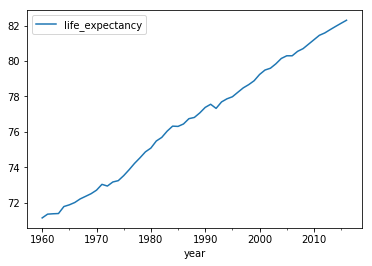

In [24]:
# Finally plot
life.plot()

# Plotting Canadian's Pharmaceutical Spending Per Capita on Y- axis and Year on X- axis 

In [36]:
# Reading Canadian's Pharmaceutical spending saved in excel spreadsheet.  Naming X-axis as year and Y-axis as USD per capita
spend = pd.read_excel('CAN SPEND.xlsx', names=['year','USD per capita'])

In [37]:
# Check the datatypes
spend.dtypes

year                int64
USD per capita    float64
dtype: object

In [38]:
# Convert to date type
spend.year = pd.to_datetime(spend.year.astype('str'))

In [ ]:
spend["USD per capita"]

In [40]:
# Set year as index
spend = spend.set_index('year')

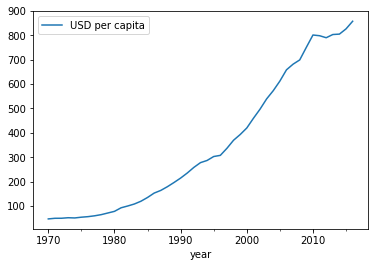

In [41]:
# Finally plot
spend.plot()

# Merging Two Datasets by Year and  then Plotting

In [44]:
# Merge Canadian's life expectancy data and Pharmaceutical spending data
merged = pd.merge(life, spend, left_index=True, right_index=True) 

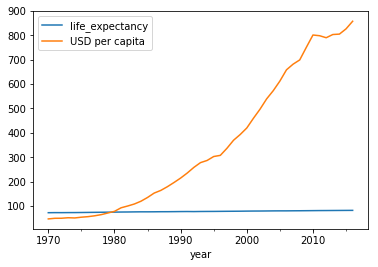

In [51]:
# Plot merged data
merged.plot()   # Scale is messed up

# Adjusting Y- axis scale to show two lines are both in upward trend

Text(0,0.5,'USD per capita')

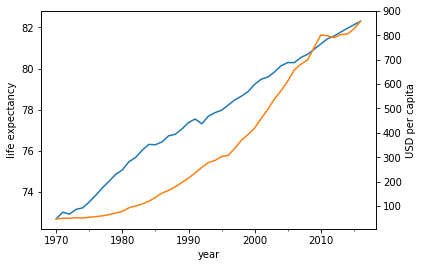

In [50]:
# Use secondary Y axis to show scale better (https://stackoverflow.com/a/45498543)
ax = merged.life_expectancy.plot()
ax2 = merged['USD per capita'].plot(secondary_y=True, ax=ax)
ax.set_ylabel('life expectancy')
ax2.set_ylabel('USD per capita')

# Jointplot shows Canadian's Life Expectancy on X- axis and Pharmaceutical Spending on Y- axis

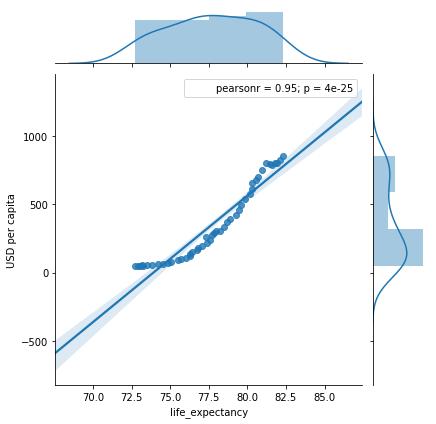

In [54]:
sns.jointplot(x='life_expectancy', y='USD per capita', data=merged, kind='reg')